In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

### Exploratory data analysis

In [2]:
avocado=pd.read_csv('avocado.csv')

In [3]:
avocado=avocado.drop('Unnamed: 0', axis=1) ## drop columns with indices from original excel file

In [4]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado.shape

(18249, 13)

The data frame has 18249 observations about 13 different avocado features. The aim is to predict AveragePrice variable based on historical data. 

In [6]:
avocado.info() #get information about variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are no missing values in this data frame. However, for "bags" variables and for one called "4770" there are observations which are zeros. Due to lack of information about the data frame and variables it is hard to tell if this is a missing infromation or it is valid. To avoid confusion, these observations will be removed.


In [7]:
avocado=avocado[avocado['Total Bags']!=0]
avocado=avocado[avocado['4770']!=0]

Also, there are three non-numeric variables: date, type and region, which need to be handled first in order to be passes to the model. Let's work with date first. There are two columns representing date: "date", which shows date in YYYYMMDD format and "year", which only shows year. There is no point in using both columns, since information is redundant. Let's consider "Date" column, since it gives more information.

In [8]:
avocado['Date']=pd.to_datetime(avocado['Date']) #convert Date to pandas datetime object


#### Numerical variables 



Let's now explore if there are any patterns in numerical variables over time.

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Date vs Total volume')

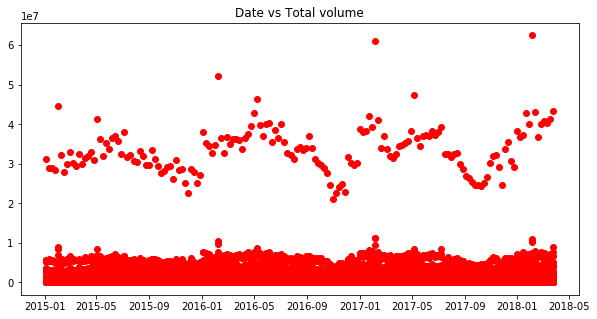

In [9]:
fig=plt.figure(figsize=(10,5))
plt.plot(avocado['Date'],avocado['Total Volume'],'ro')
plt.title('Date vs Total volume')

Text(0.5, 1.0, 'Date vs 4046')

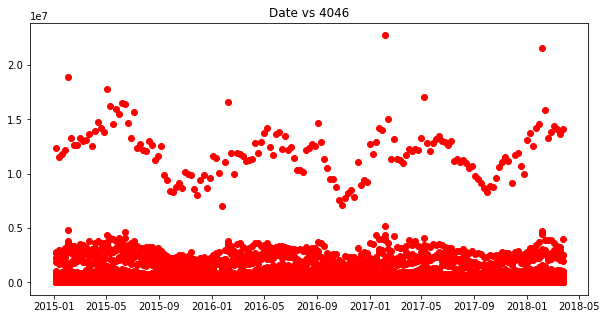

In [10]:
fig=plt.figure(figsize=(10,5))
plt.plot(avocado['Date'],avocado['4046'],'ro')
plt.title('Date vs 4046')

Text(0.5, 1.0, 'Date vs 4225')

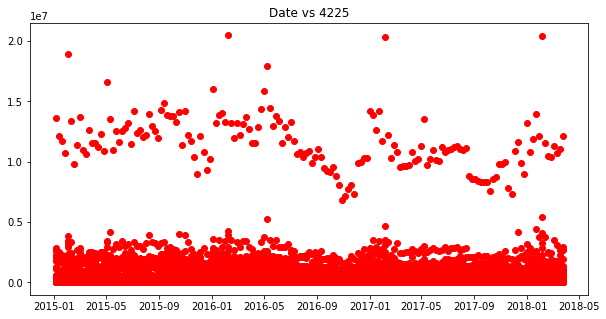

In [11]:
fig=plt.figure(figsize=(10,5))
plt.plot(avocado['Date'],avocado['4225'],'ro')
plt.title('Date vs 4225')

Text(0.5, 1.0, 'Date vs 4770')

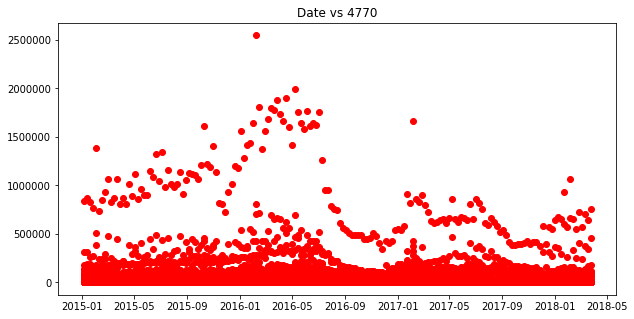

In [12]:
fig=plt.figure(figsize=(10,5))
plt.plot(avocado['Date'],avocado['4770'],'ro')
plt.title('Date vs 4770')

Text(0.5, 1.0, 'Date vs Total Bags')

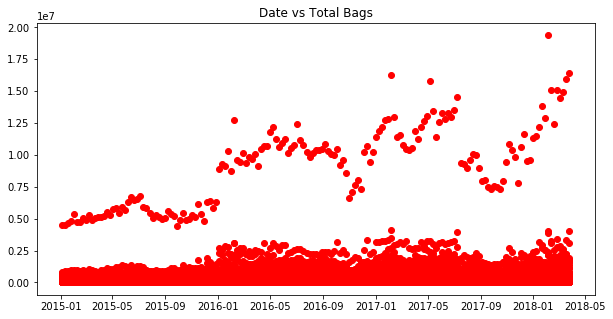

In [13]:
fig=plt.figure(figsize=(10,5))
plt.plot(avocado['Date'],avocado['Total Bags'],'ro')
plt.title('Date vs Total Bags')

According to previous plots it can be concluded that there exist seosanality patterns in variables "Total volume", "4046", "4225", "4770" and "Total Bags", at least for large values of these variables. So, the data about the date of each observation is included into these variables. Hence to avoid multicollinearity the date will not be included into the model. <br>
Also, further inspection of "Total Volume" and "Total Bags" variables reveals that these variables are highly correlated as well.

Text(0, 0.5, 'Total Bags')

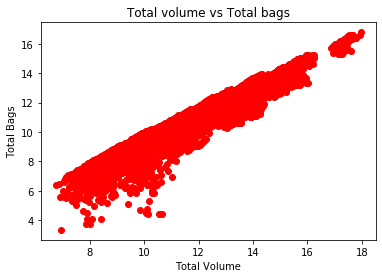

In [14]:
plt.plot(np.log(avocado['Total Volume']),np.log(avocado['Total Bags']),'ro')
plt.title('Total volume vs Total bags')
plt.xlabel('Total Volume')
plt.ylabel('Total Bags')

In [15]:
np.corrcoef(np.log(avocado['Total Volume']),np.log(avocado['Total Bags']))

array([[1.        , 0.95317924],
       [0.95317924, 1.        ]])

Correlation coefficient between logaritms of "Total Volume" and "Total Bags" is 0.95, which suggests high positive correlation, which is not surprising, since it is expected that the more bags results in higher volume. This result suggests that these variables should not be present in the model together. <br>
Furthermore, "Total bags" variable can be obtained by summing up "Small Bags", "Large Bags" and "XLarge Bags". The model can be reduced further by considering either the total number of bags or separated by size. <br>
Also, the data seems to be right-skewed, as can be seen from histograms below, so logarithmic transformation will be used for plotting and modelling.

Text(0.5, 1.0, 'Average Price')

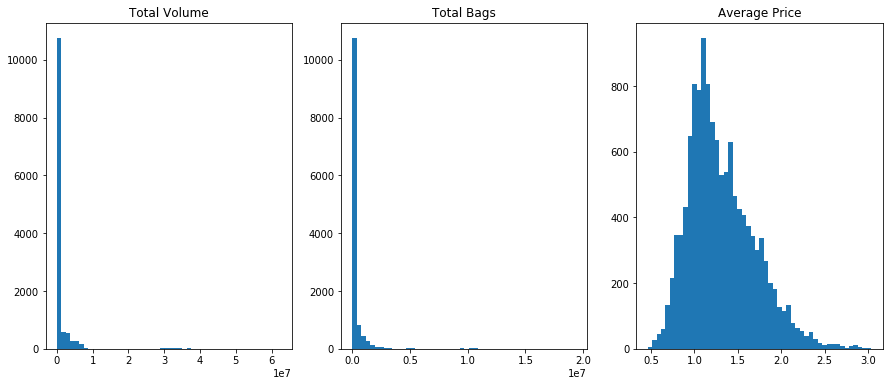

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False,figsize=(15,6))
ax1.hist(avocado['Total Volume'],bins=50)
ax1.set_title('Total Volume')
ax2.hist(avocado['Total Bags'],bins=50)
ax2.set_title('Total Bags')
ax3.hist(avocado['AveragePrice'],bins=50)
ax3.set_title('Average Price')


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Text(0.5, 0.98, 'log(Average Price) vs')

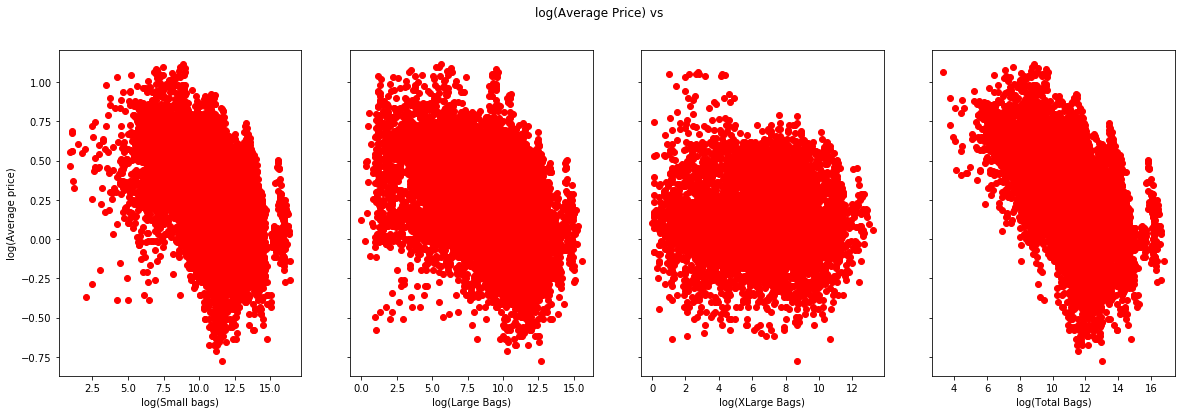

In [17]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize=(20,6))
ax1.plot(np.log(avocado['Small Bags']),np.log(avocado['AveragePrice']),'ro')
ax1.set_xlabel('log(Small bags)')
ax1.set_ylabel('log(Average price)')
ax2.plot(np.log(avocado['Large Bags']),np.log(avocado['AveragePrice']),'ro')
ax2.set_xlabel('log(Large Bags)')
ax3.plot(np.log(avocado['XLarge Bags']),np.log(avocado['AveragePrice']),'ro')
ax3.set_xlabel('log(XLarge Bags)')
ax4.plot(np.log(avocado['Total Bags']),np.log(avocado['AveragePrice']),'ro')
ax4.set_xlabel('log(Total Bags)')
fig.suptitle('log(Average Price) vs')

Separating bags by size does not seem to add value in predicting the price of avocado, according to plots. The pattern for separated bags looks similar to the total amount. Overall, there seems to be negative correlation between average price of avocados and total number of bags. Correlation coefficient of -0.52 suggests moderate negative correlation. Correlation between Total Volume and Average price is slightly bigger in magnitude (-0.57), which also suggests moderate negative correlation. Since both variables cannot be used, will stick to Total Volume variable. <br>
Let's explore other scatter plots of numeric variables and average price.


In [18]:
print('Correlation matrix between Total Bags and Average Price')
print(np.corrcoef(np.log(avocado['Total Bags']),np.log(avocado['AveragePrice'])))
print(' ')
print('Correlation matrix between Total Volume and Average Price')
print(np.corrcoef(np.log(avocado['Total Volume']),np.log(avocado['AveragePrice'])))

Correlation matrix between Total Bags and Average Price
[[ 1.         -0.52438489]
 [-0.52438489  1.        ]]
 
Correlation matrix between Total Volume and Average Price
[[ 1.         -0.57039797]
 [-0.57039797  1.        ]]


Text(0.5, 0.98, 'log(Average Price) vs')

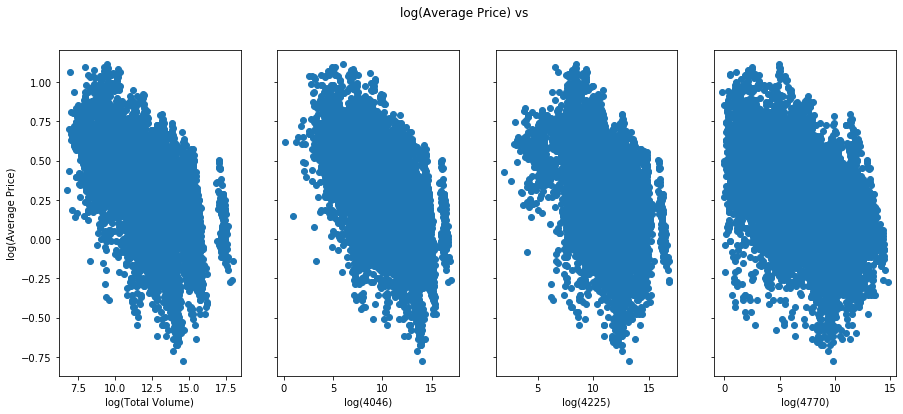

In [19]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,6))
ax1.plot(np.log(avocado['Total Volume']),np.log(avocado['AveragePrice']),'o')
ax1.set_xlabel('log(Total Volume)')
ax1.set_ylabel('log(Average Price)')
ax2.plot(np.log(avocado['4046']),np.log(avocado['AveragePrice']),'o')
ax2.set_xlabel('log(4046)')
ax3.plot(np.log(avocado['4225']),np.log(avocado['AveragePrice']),'o')
ax3.set_xlabel('log(4225)')
ax4.plot(np.log(avocado['4770']),np.log(avocado['AveragePrice']),'o')
ax4.set_xlabel('log(4770)')
fig.suptitle('log(Average Price) vs')

It looks like there is a negative trend between Average Price and each of the four variables considered in the scatter plots.<br>
Now consider non-numeric variables, namely "type" and "region". Let's explore if there appears to be any difference in average price between different groups.

#### Categorical variables

Text(0, 0.5, 'Average price')

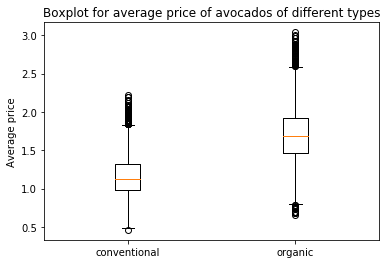

In [20]:
plt.boxplot((avocado[avocado['type']=='conventional']['AveragePrice'],avocado[avocado['type']=='organic']['AveragePrice']),
           labels=['conventional','organic'])
plt.title('Boxplot for average price of avocados of different types')
plt.ylabel('Average price')

According to boxplots, on average, avocados of organic type are more expensive and have wider spread of prices than avocados of conventional type. 

### Linear regression

So, the task now is to model average avocado price based on 4 variables: Total Volume, 4046, 4225, 4770. The data is also split by type, so we end up with two models: one for conventional avocados and one for organic avocados. <br>
The model looks like:
$$\mathbf{f}=w_{0} + w_{1} \mathbf{x_{1}} + w_{2}\mathbf{x_{2}} + w_{3}\mathbf{x_{3}} + w_{4}\mathbf{x_{4}} = X \mathbf{w}$$
Where $\mathbf{f}$ is a target vector of avocado prices, $x_{i}$ are explanatory variables and $w_{i}$ are unknown coefficients to be found. The variables are: <br>
* $\mathbf{x_{1}}$ - Total volume <br>
* $\mathbf{x_{2}}$ - 4046 <br>
* $\mathbf{x_{3}}$ - 4225 <br>
* $\mathbf{x_{2}}$ - 4770 <br>

All the variables are log-transformed. <br>
These vectors can be combined into more compact form, by gathering all explanatory variables into matrix $X$, where the first column is a vector of ones, which correspond to intercept $w_{0}$ and all coefficients are also grouped into single vector $\mathbf{w}$. <br>
The objetive is to minimise averaged square loss function: 
$$L(\mathbf{w})=\frac{1}{N} (\mathbf{f} - \mathbf{X}\mathbf{w})^T(\mathbf{f} - \mathbf{X}\mathbf{w}) $$, 
where $N$ is the number of observations.
A gradient descent method will be used to estimate coefficients $\mathbf{w}$. This is an iterative method, which uses gradient of a loss function to find optimal coefficients, which will minimise it:
$$\mathbf{w^{(k+1)}}=\mathbf{w}^{(k)}-\alpha*\frac{\partial L(\mathbf{w}^{(k)})}{\partial \mathbf{w}^{(k)}} $$,
where $\alpha$ is a learning rate to be specified, $\mathbf{w}$ is set arbitrary intially and partial derivatives are computed by:
$$ \frac{\partial L(\mathbf{w})}{\partial \mathbf{w}} = -\frac{2}{N} \left(\mathbf{X}^T\mathbf{f} - \mathbf{X}^T \mathbf{X} \mathbf{w}\right) $$

#### Data preparation

In [21]:
to_model=avocado.drop(['Date','year','region','Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1)
## Drop variables that are not used in modelling

In [22]:
#Split data by type of avocado
conventional=to_model[to_model['type']=='conventional']
organic=to_model[to_model['type']=='organic']


#### Split data into train and test sets

In [23]:
#Split conventional data into train and test sets
con_train=conventional.sample(frac=0.8) #samples train set of size 80% 
con_train_index=con_train.index #identify indices of training set
con_test=conventional[~conventional.index.isin(con_train_index)] #the test set is remaining data, with indices 
#not equal to indices of train data 


In [24]:
#Split organic data into train and test sets
org_train=organic.sample(frac=0.8) #samples train set of size 80% 
org_train_index=org_train.index
org_test=organic[~organic.index.isin(org_train_index)]

In [25]:
X_conv=con_train.drop(['AveragePrice','type'],axis=1).values ##create matrix with explanatory variables
f_conv=con_train['AveragePrice'].values ## create array of target variable
X_test_conv=con_test.drop(['AveragePrice','type'],axis=1).values
f_test_conv=con_test['AveragePrice'].values

X_org=org_train.drop(['AveragePrice','type'],axis=1).values
f_org=org_train['AveragePrice'].values
X_test_org=org_test.drop(['AveragePrice','type'],axis=1).values
f_test_org=org_test['AveragePrice'].values

In [26]:
## log-transform matrices
X_conv=np.log(X_conv)
X_org=np.log(X_org)

X_test_conv=np.log(X_test_conv)
X_test_org=np.log(X_test_org)

In [27]:
## create vectors of ones as a first column of matrix X
ones_conv=np.ones(X_conv.shape[0])[:,None] # create an empty dimension to allow for multiplication between arrays of 
#different number of dimensions
ones_org=np.ones(X_org.shape[0])[:,None]

ones_test_conv=np.ones(X_test_conv.shape[0])[:,None]
ones_test_org=np.ones(X_test_org.shape[0])[:,None]

In [28]:
## concatenate vectors of ones with data matrices
X_conv=np.concatenate((ones_conv,X_conv),axis=1)
X_org=np.concatenate((ones_org,X_org),axis=1)

X_test_conv=np.concatenate((ones_test_conv,X_test_conv),axis=1)
X_test_org=np.concatenate((ones_test_org,X_test_org),axis=1)

#### Applying gradient descent to fing parameters

In [29]:
def loss(w, X, f): # define the loss function
    w = w[:,None] ## add a new empty dimension to allow multiplication of arrays with different number of dimensions
    L = np.mean( (f-np.dot(X, w))**2 ) # the average squared loss function
    return(L)

In [30]:
def gradient(w, X, f): # define the gradient function
    w = w[:,None]
    g = -2.0/len(f) * ( np.dot( np.transpose(X), f ) - np.dot(np.transpose(X), np.dot(X, w)) ) ##gradient of the squared loss function
    return(g[:,0])

In [31]:
### Conventional type avocados
alpha = 0.001# learning rate
precision = 1e-3 # convergence criterion
w_old = np.ones(X_conv.shape[1]) # Intial guess
prec=10 #inital randomly large precision
i=0 #parameter to count number of iterations

while prec>precision and i<1000: # check convergence, stop when coefficients do not change significantly
    #or when number of iterations taken exceedes 1000
    i+=1 #counts interations
    g = gradient(w_old,X_conv, np.log(f_conv)) # compute gradient at w_old
    w_new_conv = w_old - alpha * g # update parameters
    prec=sum(abs(w_new_conv-w_old)) #calculate new value for convergence checking
    w_old=w_new_conv #update w_old 

In [32]:
### Organic type avocados
alpha = 0.001# learning rate
precision = 1e-3 # convergence criterion
w_old = np.ones(X_org.shape[1]) # Intial guess
i=0#parameter to count number of iterations
prec=10 #inital randomly large precision

while prec>precision and i<1000: # check convergence, stop when coefficients do not change significantly
    #or when number of iterations taken exceedes 1000
    i+=1
    g = gradient(w_old,X_org, np.log(f_org)) # compute gradient at w_old
    w_new_org = w_old - alpha * g # update parameters
    prec=sum(abs(w_new_org-w_old))#calculate new value for convergence checking
    w_old=w_new_org#update w_old 

#### Training results

In [33]:
print('The final loss for model for conventional type is {}'.format(round(loss(w_new_conv,X_conv,np.log(f_conv)),5)))
print('The final loss for model for organic type is {}'.format(round(loss(w_new_org,X_org,np.log(f_org)),5)))
print(' ')
print('The coefficients for model for conventional type are {}'.format(w_new_conv))
print('The coefficients for model for organic type are {}'.format(w_new_org))

The final loss for model for conventional type is 0.09452
The final loss for model for organic type is 0.29392
 
The coefficients for model for conventional type are [ 0.95554196 -0.12049824  0.01007583 -0.01823013  0.08898508]
The coefficients for model for organic type are [ 1.76079    -0.30542228  0.12174988  0.02627076  0.06198061]


The first coefficient corresponds to the intercept. It means that when all the rest variables are set to zero, the average prices for avocado of conventional and organic types are 0.96 and 1.76 respectively. This confirms previous observation about organic avocados being more expensive than conventional. Then, the order of variables is the following: Total volume, 4046, 4225 and 4770. In both cases the most influential variable is Total volume: after intercept it has the largest coefficient in magnitude (-0.12 and -0.31). This coefficient means that for every one unit increase in Total volume, the corresponding price of avocado decreases by 0.12 and 0.31 monetary units for conventional and organic types respectively. Interesting observation here is that, when variables are considered together, some of them change trend from negative (as was shown in scatter plots earlier) to positive (positive coefficients). 

#### Run the model on test set

Check how does the model perform on the test set by substituting values from the test set to the model, obtaining results and computing the loss between true outcome and predicted one.

In [34]:
print('The loss between actual outcome and predicted one for the conventional type on a test set: {}'
      .format(round(loss(w_new_conv,X_test_conv,np.log(f_test_conv)),5)))
print('The loss between actual outcome and predicted one for the organic type on a test set: {}'
      .format(round(loss(w_new_org,X_test_org,np.log(f_test_org)),5)))

The loss between actual outcome and predicted one for the conventional type on a test set: 0.09495
The loss between actual outcome and predicted one for the organic type on a test set: 0.30132


So, the model performs well on the test set, the loss values are very close to the ones obtained during training, which means that model generalizes well, at least within this data set. 

In order to make predictions, need to substitute obtained coefficients into model shown in the beginning of the section, remembering to take exponential, since data was log-transformed.

In [41]:
y_pred_conv=np.exp(np.dot(X_test_conv,w_new_conv))# predictions for price of avocados of conventional type
y_pred_org=np.exp(np.dot(X_test_org,w_new_org))# predicitons for price of avocados of organic type